# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import itertools

# Getting dataset

In [2]:
data_set = pd.read_excel('Sample - Superstore.xls')


In [3]:
data_set.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
type(data_set['Order Date'])

pandas.core.series.Series

# Data Preprocessing

In [5]:
data_set.shape

(9994, 21)

In [6]:
data_set.info

<bound method DataFrame.info of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer 

In [7]:
data_set.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data_set.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
data_set.columns



Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
data_set['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [11]:
data_set['Profit-Margin'] =(data_set.Profit/data_set.Sales)*100

<AxesSubplot:ylabel='Category'>

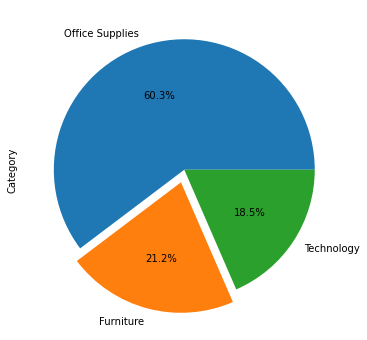

In [12]:
data_set['Category'].value_counts().plot(figsize = (8,6), kind = 'pie', autopct='%1.1f%%', explode = [0,0.1,0])

In [13]:
data_set['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

there is only one country in data set(United States) so we can drop it. 

In [14]:
data_set['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

<AxesSubplot:>

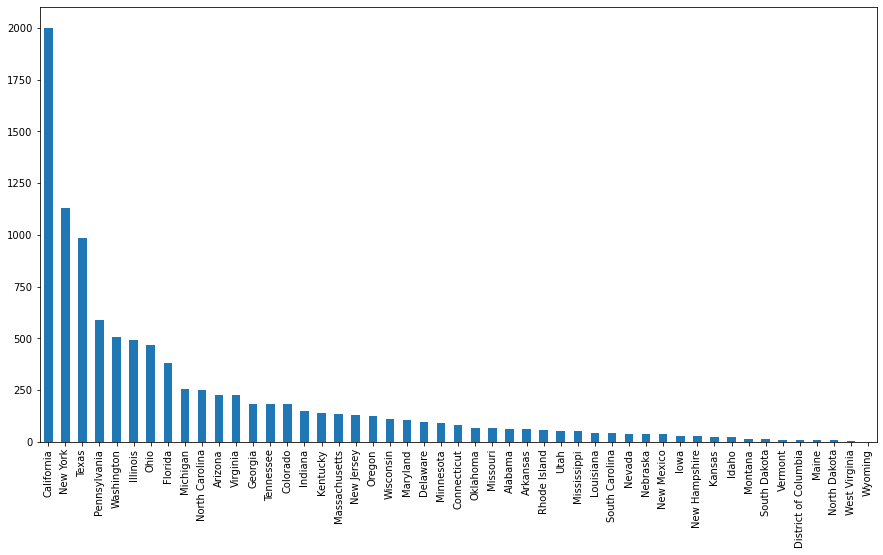

In [15]:
data_set['State'].value_counts().plot(figsize = (15,8),kind= 'bar')

In [16]:
data_set['State'].value_counts()[0:6]
# Top 5 states who buys from superstore.

California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Illinois         492
Name: State, dtype: int64

In [17]:
data_set['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:>

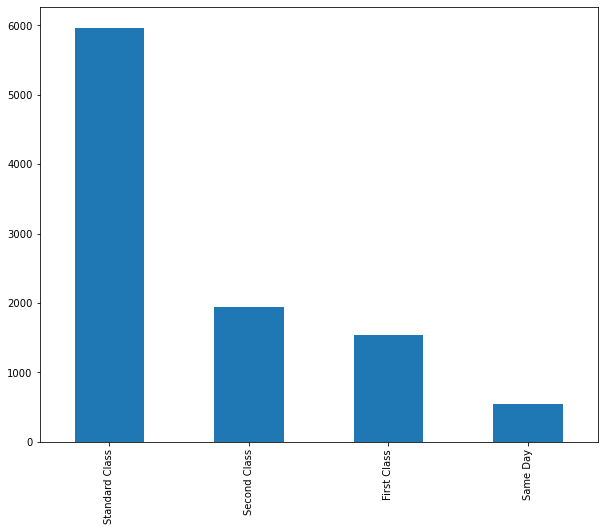

In [18]:
data_set['Ship Mode'].value_counts().plot(figsize = (10,8),kind = 'bar')

<AxesSubplot:ylabel='Segment'>

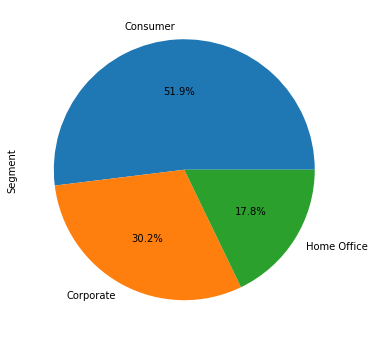

In [19]:
data_set['Segment'].value_counts().plot(figsize = (8,6),kind = 'pie', autopct = '%1.1f%%')

What Categories generate the most/least revenue and profit?

In [20]:
cat_analysis=pd.DataFrame(data_set.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
cat_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741999.7953,18451.2728,8028
Office Supplies,719047.0320,122490.8008,22906
Technology,836154.0330,145454.9481,6939


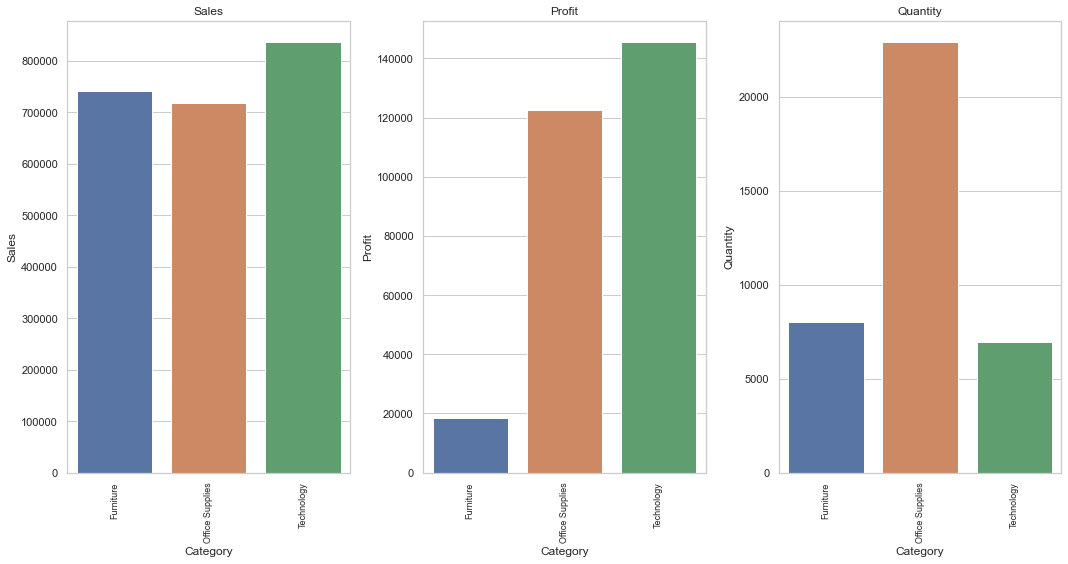

In [21]:
import seaborn as sns
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(15, 8))
# Plot barplots
cat1 = sns.barplot(x = cat_analysis.index, y = cat_analysis.Sales, ax=axis[0])
cat2 = sns.barplot(x = cat_analysis.index, y = cat_analysis.Profit, ax=axis[1])
cat3 = sns.barplot(x = cat_analysis.index, y = cat_analysis.Quantity, ax=axis[2])
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

hat Sub-Categories generate the most/least revenue and profit?

[Text(0, 0, 'Binders'),
 Text(1, 0, 'Paper'),
 Text(2, 0, 'Furnishings'),
 Text(3, 0, 'Phones'),
 Text(4, 0, 'Storage'),
 Text(5, 0, 'Art'),
 Text(6, 0, 'Accessories'),
 Text(7, 0, 'Chairs'),
 Text(8, 0, 'Appliances'),
 Text(9, 0, 'Labels'),
 Text(10, 0, 'Tables'),
 Text(11, 0, 'Fasteners'),
 Text(12, 0, 'Envelopes'),
 Text(13, 0, 'Bookcases'),
 Text(14, 0, 'Supplies'),
 Text(15, 0, 'Machines'),
 Text(16, 0, 'Copiers')]

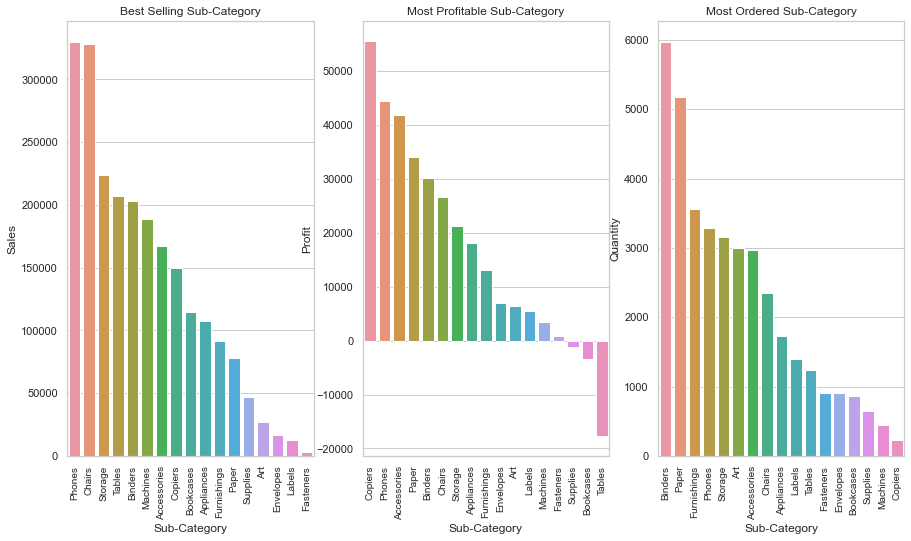

In [22]:
# Group subcategory by sales, profit and quantity
subcat_analysis=pd.DataFrame(data_set.groupby('Sub-Category')[['Sales', 'Profit', 'Quantity']].sum())
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
# Sort by descending order according to profit
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
# Sort by descending order according to purchase quantity
subcat_quantity = pd.DataFrame(subcat_analysis.sort_values('Quantity', ascending = False))
# Plot Bar Plots
sns.set_theme(style="whitegrid")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 3,  figsize=(15, 8))
# Plotting Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
# Plotting Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
# Plotting Bar Plot for Most Ordered Sub-Category
subcat3 = sns.barplot(data = subcat_profit, x = subcat_quantity.index, y = subcat_quantity.Quantity, ax=axis[2])
subcat3.set(title = "Most Ordered Sub-Category")
subcat3.set_xticklabels(subcat3.get_xticklabels(),rotation = "vertical", size = 10)

In [23]:
# Group product name by Profit
product_analysis = pd.DataFrame(data_set.groupby(['Product Name'])[['Profit', 'Sales', 'Quantity']].sum())
# Sort by descending order according to sales
product_sales = pd.DataFrame(product_analysis.sort_values('Sales', ascending = False))
# Sort by descending order according to profit
product_profit = pd.DataFrame(product_analysis.sort_values('Profit', ascending = False))
# Sort by descending order according to purchase quantity
product_quantity = pd.DataFrame(product_analysis.sort_values('Quantity', ascending = False))

# Get top 5 products by Profit
# Compare against their respective sales and quantity
product_profit.head()

,Profit,Sales,Quantity
Product Name,,,
Canon imageCLASS 2200 Advanced Copier,25199.9280,61599.824,20
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390,27453.384,31
Hewlett Packard LaserJet 3310 Copier,6983.8836,18839.686,38
Canon PC1060 Personal Laser Copier,4570.9347,11619.834,19
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766,18374.895,12


In [24]:
# Get Bottom 5 Products by profit
# Compare against their respective sales and quantity
product_profit.tail()

,Profit,Sales,Quantity
Product Name,,,
Bush Advantage Collection Racetrack Conference Table,-1934.3976,9544.725,33
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.1156,9917.640,27
Cubify CubeX 3D Printer Triple Head Print,-3839.9904,7999.980,4
Lexmark MX611dhe Monochrome Laser Printer,-4589.9730,16829.901,18
Cubify CubeX 3D Printer Double Head Print,-8879.9704,11099.963,9


What states generate the most/least sales?

In [25]:
# Group states by sales, profit and quantity
state_group = pd.DataFrame(data_set.groupby(['State'])[['Sales', 'Profit', 'Quantity']].sum())
# Sort by Sales in descending order
state_sales = pd.DataFrame(state_group.sort_values('Sales', ascending = False))
# Get top 5 states by sales and compare against their respective profit and quantity
state_sales.head()

,Sales,Profit,Quantity
State,,,
California,457687.6315,76381.3871,7667
New York,310876.2710,74038.5486,4224
Texas,170188.0458,-25729.3563,3724
Washington,138641.2700,33402.6517,1883
Pennsylvania,116511.9140,-15559.9603,2153


In [26]:
state_sales.tail()

,Sales,Profit,Quantity
State,,,
Wyoming,1603.136,100.1960,4
South Dakota,1315.560,394.8283,42
Maine,1270.530,454.4862,35
West Virginia,1209.824,185.9216,18
North Dakota,919.910,230.1497,30


There are several categories in the Superstore sales data, we start from time series analysis and forecasting for furniture sales.

In [27]:
furniture = data_set.loc[data_set['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [28]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [29]:
furniture

,Order Date,Sales,Profit-Margin
7474,2014-01-06,2573.820,29.00
7660,2014-01-07,76.728,-70.00
866,2014-01-10,51.940,41.00
716,2014-01-11,9.940,31.00
2978,2014-01-13,545.940,16.00
...,...,...,...
7636,2017-12-29,258.750,30.00
7632,2017-12-29,1207.840,26.00
5131,2017-12-29,101.120,37.00
7635,2017-12-29,300.980,29.00


In [30]:
furniture.head()

,Order Date,Sales,Profit-Margin
7474,2014-01-06,2573.820,29.0
7660,2014-01-07,76.728,-70.0
866,2014-01-10,51.940,41.0
716,2014-01-11,9.940,31.0
2978,2014-01-13,545.940,16.0


In [31]:
furniture['Order Date'].min(), furniture['Order Date'].max(),

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

So we have a solid 4 year data

In [32]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [33]:
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


Indexing with Time Series Data

In [34]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

<AxesSubplot:xlabel='Order Date'>

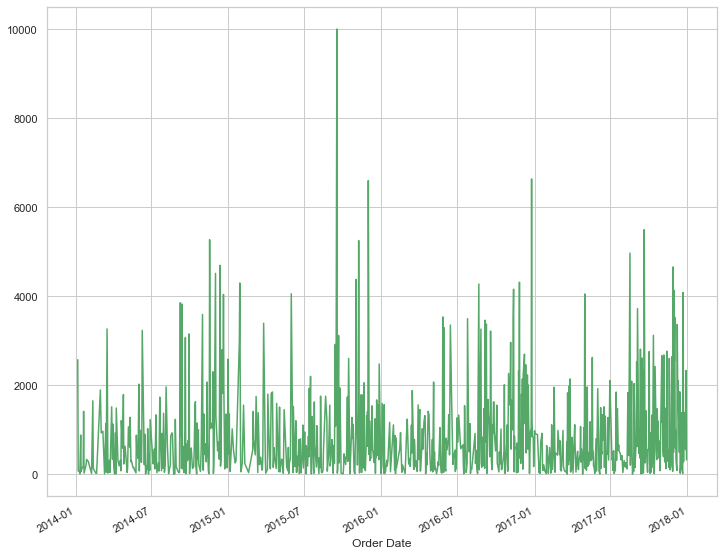

In [35]:
furniture['Sales'].plot(figsize = (12,10),  color = 'g',ls = '-')

In [36]:
y = furniture['Sales'].resample('MS').mean()
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

# Visualizing Furniture Sales Time Series Data

<AxesSubplot:xlabel='Order Date'>

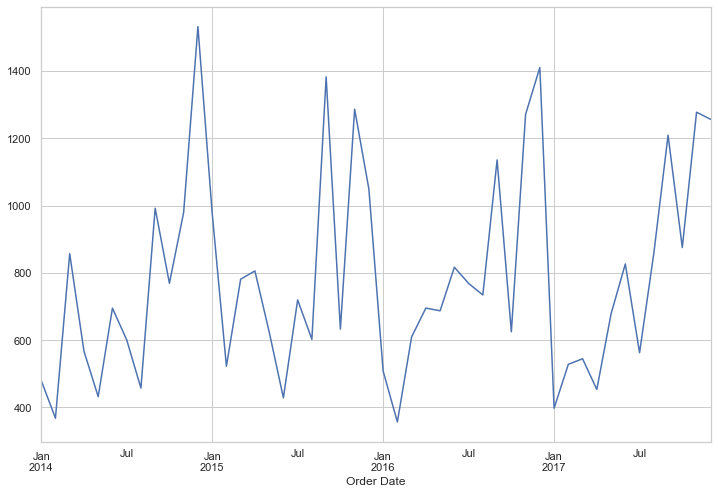

In [37]:
y.plot(figsize = (12,8))

In [38]:
import statsmodels.api as sm

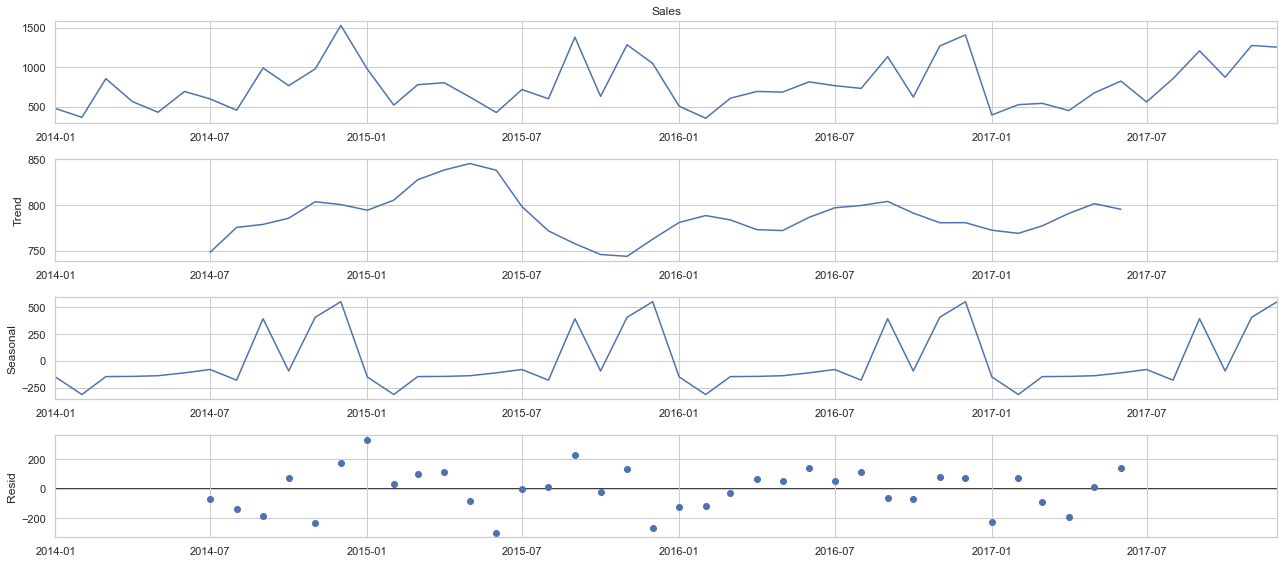

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# Time series forecasting with ARIMA

In [40]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:784.7193402038779


# Fitting the ARIMA model

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
#                                 enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Validating forecasts

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [ ]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

# Producing and visualizing forecasts

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# Time Series of Furniture vs. Office Supplies

In [ ]:
furniture = data_set.loc[data_set['Category'] == 'Furniture']
office = data_set.loc[data_set['Category'] == 'Office Supplies']
furniture.shape, office.shape

# Data Exploration

In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
        'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 
        'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

In [ ]:
first_date = store.loc[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))